In [75]:
import pandas as pd
import os
import gzip
import matplotlib.pyplot as plt

# Налаштування графіків
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# Задайте шляхи до файлів
log_directory = 'C:/Users/Yar/Desktop/гадюка/Senior/2'
log_file = 'logs.gz'  # Файл для аналізу
output_file = 'C:/Users/Yar/Desktop/гадюка/Senior/2/site_logs.csv'

log_path = os.path.join(log_directory, log_file)

def process_log_file(log_path, output_file):
    total_lines = 0

    # Відкриття gzip файлу для читання
    with gzip.open(log_path, 'rb') as f:
        print(f'{log_path} is opened')
        with open(output_file, 'w', encoding='UTF-8') as result:
            for line in f:
                line = line.decode(errors='ignore').strip()
                if line:
                    result.write(f'{line}\n')
                    total_lines += 1

    return total_lines

# Обробка лог-файлу
total_lines = process_log_file(log_path, output_file)

print(f'File: {log_file}')
print(f'Total lines written to {output_file}: {total_lines}')



C:/Users/Yar/Desktop/гадюка/Senior/2\logs.gz is opened
File: logs.gz
Total lines written to C:/Users/Yar/Desktop/гадюка/Senior/2/site_logs.csv: 8153


In [76]:
log_df = pd.read_csv('C:/Users/Yar/Desktop/гадюка/Senior/2/site_logs.csv', sep=' ', encoding='UTF-8', error_bad_lines=False)

In [77]:
log_df

,172.68.26.165,-,-.1,[18/Nov/2023:06:36:12,+0200],GET /women/legginsy/legginsyi-strejch-ls-01-01-chyornyij/?size=52 HTTP/2.0,200,24340,-.2,"Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.6045.123 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"
0,172.68.26.218,-,-,[18/Nov/2023:06:36:18,+0200],GET /women/legginsy/legginsyi-strejch-ls-01-01...,200,24331,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
1,172.68.26.54,-,-,[18/Nov/2023:06:36:19,+0200],GET /women/legginsy/legginsyi-strejch-ls-01-01...,200,24342,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
2,172.71.134.94,-,-,[18/Nov/2023:06:37:19,+0200],GET /uk/women/sarafani/litnij-sarafan-na-brete...,200,25272,-,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...
3,172.68.26.165,-,-,[18/Nov/2023:06:37:20,+0200],GET /uk/women/halati/velyurovyj-halat-na-molni...,200,24556,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
4,162.158.239.60,-,-,[18/Nov/2023:06:38:15,+0200],GET / HTTP/2.0,200,23198,-,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
...,...,...,...,...,...,...,...,...,...,...
8147,213.133.113.83,-,-,[19/Nov/2023:06:46:27,+0200],GET / HTTP/1.1,200,171349,-,Hetzner System Monitoring
8148,172.71.134.113,-,-,[19/Nov/2023:06:48:04,+0200],GET /uk/women/tuniki/razmer-44/sezon-leto/ HTT...,200,17774,-,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...
8149,162.158.238.36,-,-,[19/Nov/2023:06:48:35,+0200],GET / HTTP/2.0,200,23185,-,Mozilla/5.0 (compatible; YandexMetrika/2.0; +h...
8150,162.158.238.80,-,-,[19/Nov/2023:06:49:02,+0200],GET /articles/chto-nadet-v-indiu-soveti-dlya-s...,200,16783,https://www.google.com/,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...


In [78]:
headers = ['IP','Delimiter2','Delimiter3','Date','Time zone','Request','Status code','Bytes', 'Referer', 'User-Agent']
log_df.columns = headers
log_df.head(2)

,IP,Delimiter2,Delimiter3,Date,Time zone,Request,Status code,Bytes,Referer,User-Agent
0,172.68.26.218,-,-,[18/Nov/2023:06:36:18,+0200],GET /women/legginsy/legginsyi-strejch-ls-01-01...,200,24331,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
1,172.68.26.54,-,-,[18/Nov/2023:06:36:19,+0200],GET /women/legginsy/legginsyi-strejch-ls-01-01...,200,24342,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [79]:
log_df.drop(['Delimiter2','Delimiter3','Time zone'], axis=1, inplace=True)
log_df.head(2)

,IP,Date,Request,Status code,Bytes,Referer,User-Agent
0,172.68.26.218,[18/Nov/2023:06:36:18,GET /women/legginsy/legginsyi-strejch-ls-01-01...,200,24331,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
1,172.68.26.54,[18/Nov/2023:06:36:19,GET /women/legginsy/legginsyi-strejch-ls-01-01...,200,24342,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [80]:
new_df = log_df['Request'].str.split(' ',expand=True)
new_df.columns=['Method','Path','Protocol']
log_df = pd.concat([log_df,new_df],axis=1)
log_df.drop(['Request'], axis=1, inplace=True)
log_df.head(2)

,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol
0,172.68.26.218,[18/Nov/2023:06:36:18,200,24331,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0
1,172.68.26.54,[18/Nov/2023:06:36:19,200,24342,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0


In [81]:
log_df = log_df[~log_df['Date'].str.contains('Mobile', na=False)]
log_df = log_df[~log_df['Date'].str.contains('0200]', na=False)]

log_df['Date'] = log_df['Date'].str.replace('[', '', regex=False)
log_df['Date'] = log_df['Date'].str.replace(']', '', regex=False) 

log_df['Date'] = pd.to_datetime(log_df['Date'], format='%d/%b/%Y:%H:%M:%S')

log_df.head(2)

,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol
0,172.68.26.218,2023-11-18 06:36:18,200,24331,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0
1,172.68.26.54,2023-11-18 06:36:19,200,24342,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0


In [82]:
log_df['User-Agent'] = log_df['User-Agent'].astype(str)
log_df

,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol
0,172.68.26.218,2023-11-18 06:36:18,200,24331,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0
1,172.68.26.54,2023-11-18 06:36:19,200,24342,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0
2,172.71.134.94,2023-11-18 06:37:19,200,25272,-,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,GET,/uk/women/sarafani/litnij-sarafan-na-bretelyah...,HTTP/2.0
3,172.68.26.165,2023-11-18 06:37:20,200,24556,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/uk/women/halati/velyurovyj-halat-na-molnii-s-...,HTTP/2.0
4,162.158.239.60,2023-11-18 06:38:15,200,23198,-,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,GET,/,HTTP/2.0
...,...,...,...,...,...,...,...,...,...
8147,213.133.113.83,2023-11-19 06:46:27,200,171349,-,Hetzner System Monitoring,GET,/,HTTP/1.1
8148,172.71.134.113,2023-11-19 06:48:04,200,17774,-,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,GET,/uk/women/tuniki/razmer-44/sezon-leto/,HTTP/2.0
8149,162.158.238.36,2023-11-19 06:48:35,200,23185,-,Mozilla/5.0 (compatible; YandexMetrika/2.0; +h...,GET,/,HTTP/2.0
8150,162.158.238.80,2023-11-19 06:49:02,200,16783,https://www.google.com/,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,GET,/articles/chto-nadet-v-indiu-soveti-dlya-shens...,HTTP/2.0


In [ ]:
Коди відповідей (усі) які є в файлі

In [85]:
import pandas as pd

response_counts = log_df['Status code'].value_counts().reset_index()
response_counts.columns = ['Response Code', 'Count']

print(response_counts)


   Response Code  Count
0            200   6552
1            404    647
2            301    459
3            400    364
4            302     68
5            499     54
6            500      4
7            403      4


In [ ]:
Присвоєння ботів і визначення справжніх ботів

In [96]:
import pandas as pd
import requests
import ipaddress

# Завантаження IP-префіксів з JSON-ресурсів
def load_ip_prefixes(urls):
    prefixes = []
    for url in urls:
        try:
            response = requests.get(url)
            data = response.json()
            for prefix in data.get("prefixes", []):
                if "ipv4Prefix" in prefix:
                    prefixes.append(prefix["ipv4Prefix"])
                elif "ipv6Prefix" in prefix:
                    prefixes.append(prefix["ipv6Prefix"])
        except Exception as e:
            print(f"Помилка при завантаженні {url}: {e}")
    return prefixes

# Список URL для завантаження IP-префіксів
urls = [
    "https://developers.google.com/static/search/apis/ipranges/googlebot.json",
    "https://developers.google.com/static/search/apis/ipranges/special-crawlers.json",
    "https://developers.google.com/static/search/apis/ipranges/user-triggered-fetchers.json",
    "https://developers.google.com/static/search/apis/ipranges/user-triggered-fetchers-google.json",
    "https://developers.google.com/search/apis/ipranges/googlebot.json"
]

# Завантаження префіксів
ip_prefixes = load_ip_prefixes(urls)

# Перевірка, чи IP-адреса належить до одного з префіксів
def is_valid_bot_ip(ip):
    try:
        ip_addr = ipaddress.ip_address(ip)
        for prefix in ip_prefixes:
            if ip_addr in ipaddress.ip_network(prefix):
                return True
        return False
    except ValueError:
        return False

# Додавання визначення ботів на основі User-Agent та IP-адреси
bot = []
for index, row in log_df.iterrows():
    ua = row['User-Agent']
    ip = row['IP']  # Припускається, що в log_df є стовпець 'IP' з IP-адресами

    if 'Googlebot' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid Googlebot')
        else:
            bot.append('Fake Googlebot')
    elif 'Storebot-Google' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid Google StoreBot')
        else:
            bot.append('Fake Google StoreBot')
    elif 'Google-InspectionTool' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid Google InspectionTool')
        else:
            bot.append('Fake Google InspectionTool')
    elif 'GoogleOther' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid GoogleOther')
        else:
            bot.append('Fake GoogleOther')
    elif 'bingbot' in ua or 'adidxbot' in ua:
        if is_valid_bot_ip(ip):
            bot.append('Valid Bingbot')
        else:
            bot.append('Fake Bingbot')
    elif 'AhrefsBot' in ua:
        bot.append('AhrefsBot')
    elif 'YandexBot' in ua:
        bot.append('YandexBot')
    else:
        bot.append('Other Bot')

log_df['Bot'] = bot

# Відображення перших рядків DataFrame
log_df.head()


,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol,Bot,Page type
0,172.68.26.218,2023-11-18 06:36:18,200,24331,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0,Fake Googlebot,Product
1,172.68.26.54,2023-11-18 06:36:19,200,24342,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0,Fake Googlebot,Product
2,172.71.134.94,2023-11-18 06:37:19,200,25272,-,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,GET,/uk/women/sarafani/litnij-sarafan-na-bretelyah...,HTTP/2.0,AhrefsBot,Product
3,172.68.26.165,2023-11-18 06:37:20,200,24556,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/uk/women/halati/velyurovyj-halat-na-molnii-s-...,HTTP/2.0,Fake Googlebot,Product
4,162.158.239.60,2023-11-18 06:38:15,200,23198,-,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,GET,/,HTTP/2.0,Other Bot,Main


In [ ]:
Визначення типів сторінок

In [98]:
import re

# Видалення пропущених значень у DataFrame
log_df = log_df.dropna()

# Переконаємося, що всі значення в колонці 'Path' є рядками
log_df['Path'] = log_df['Path'].astype(str)

# Список для збереження типів сторінок
product_type = []

# Перевірка шляху (Path) для визначення типу сторінки
for p in log_df['Path']:
    if p in ['/', 'http://paniyanovska.ua/', 'https://paniyanovska.ua/']:
        # Головна сторінка
        product_type.append('Main')
    elif re.match(r'^\/(uk|ru)?\/?(women|men|children)\/$', p):
        # Основні категорії
        product_type.append('Category')
    elif re.match(r'^\/(uk|ru)?\/?(women|men|children)\/[^\/]+\/$', p):
        # Підкатегорії
        product_type.append('Category')
    elif re.search(r'\d', p) and not re.search(r'(\/razmer-|\/page-)', p):
        # Картки товару
        product_type.append('Product')
    elif re.search(r'(\/sezon-|\/razmer-|\/sostav-|\/cvet-|\/material-|\/stil-|\/kroj-|\/naznachenie-|\/risunok-|\/detali-|\/svojstva-|\/vyrez-|\/tip-)', p):
        # Фільтри
        product_type.append('Filter')
    elif '/articles/' in p:
        # Блог
        product_type.append('Blog')
    elif re.search(r'\.(jpg|jpeg|png|gif|webp)$', p, re.IGNORECASE):
        # Зображення
        product_type.append('Images')
    else:
        # Інші сторінки
        product_type.append('Other')

# Додавання нового стовпця до DataFrame
log_df['Page type'] = product_type

# Виведення перших 10 рядків DataFrame
log_df.head(10)

,IP,Date,Status code,Bytes,Referer,User-Agent,Method,Path,Protocol,Bot,Page type
0,172.68.26.218,2023-11-18 06:36:18,200,24331,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0,Fake Googlebot,Product
1,172.68.26.54,2023-11-18 06:36:19,200,24342,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,GET,/women/legginsy/legginsyi-strejch-ls-01-01-chy...,HTTP/2.0,Fake Googlebot,Product
2,172.71.134.94,2023-11-18 06:37:19,200,25272,-,Mozilla/5.0 (compatible; AhrefsBot/7.0; +http:...,GET,/uk/women/sarafani/litnij-sarafan-na-bretelyah...,HTTP/2.0,AhrefsBot,Product
3,172.68.26.165,2023-11-18 06:37:20,200,24556,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/uk/women/halati/velyurovyj-halat-na-molnii-s-...,HTTP/2.0,Fake Googlebot,Product
4,162.158.239.60,2023-11-18 06:38:15,200,23198,-,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,GET,/,HTTP/2.0,Other Bot,Main
5,162.158.239.50,2023-11-18 06:38:34,200,14047,-,"Mozilla/5.0 AppleWebKit/537.36 (KHTML, like Ge...",GET,/women/majki/cvet-belyj/razmer-15/,HTTP/2.0,Fake Bingbot,Filter
6,213.133.113.83,2023-11-18 06:38:34,200,171772,-,Hetzner System Monitoring,GET,/,HTTP/1.1,Other Bot,Main
7,172.68.26.109,2023-11-18 06:38:44,200,25084,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,GET,/women/pizhamy-i-komplekty/pizhama-zhenskaya-b...,HTTP/2.0,Fake Googlebot,Product
8,172.68.26.109,2023-11-18 06:38:52,200,18237,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/uk/men/kapri/,HTTP/2.0,Fake Googlebot,Category
9,172.68.26.218,2023-11-18 06:39:09,200,15368,-,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,GET,/children/trusy/cvet-fioletovyj/stil-povsednev...,HTTP/2.0,Fake Googlebot,Filter


In [ ]:
Вивести графіки сканування ботами

Valid Bots Analysis
Empty DataFrame
Columns: [Bot Type, Count, Total Percentage]
Index: []

Fake Bots Analysis
           Bot Type  Count  Percentage  Total Percentage
0    Fake Googlebot   1474       82.90             18.12
1      Fake Bingbot    298       16.76              3.66
2  Fake GoogleOther      6        0.34              0.07


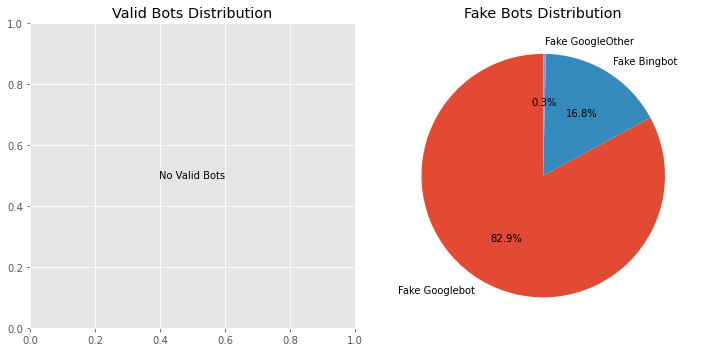

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Фільтрація валідних і фейкових ботів
valid_bots = log_df[log_df['Bot'].str.contains('Valid', na=False)]
fake_bots = log_df[log_df['Bot'].str.contains('Fake', na=False)]

# Підрахунок типів валідних ботів
valid_bot_counts = valid_bots['Bot'].value_counts().reset_index()
valid_bot_counts.columns = ['Bot Type', 'Count']

# Підрахунок типів фейкових ботів
fake_bot_counts = fake_bots['Bot'].value_counts().reset_index()
fake_bot_counts.columns = ['Bot Type', 'Count']

# Розрахунок відсотків для валідних ботів
total_valid = valid_bots.shape[0]
if total_valid > 0:
    valid_bot_counts['Percentage'] = (valid_bot_counts['Count'] / total_valid * 100).round(2)

# Розрахунок відсотків для фейкових ботів
total_fake = fake_bots.shape[0]
if total_fake > 0:
    fake_bot_counts['Percentage'] = (fake_bot_counts['Count'] / total_fake * 100).round(2)

# Розрахунок загальної кількості ботів
total_bots = log_df.shape[0]

# Додавання відсотків від загальної кількості ботів
if total_bots > 0:
    valid_bot_counts['Total Percentage'] = (valid_bot_counts['Count'] / total_bots * 100).round(2)
    fake_bot_counts['Total Percentage'] = (fake_bot_counts['Count'] / total_bots * 100).round(2)

# Виведення таблиць для валідних і фейкових ботів
print("Valid Bots Analysis")
print(valid_bot_counts)

print("\nFake Bots Analysis")
print(fake_bot_counts)

# Побудова графіків
plt.figure(figsize=(10, 5))

# Графік для валідних ботів
plt.subplot(1, 2, 1)
if not valid_bot_counts.empty:
    plt.pie(valid_bot_counts['Count'], labels=valid_bot_counts['Bot Type'], autopct='%1.1f%%', startangle=90)
    plt.title('Valid Bots Distribution')
else:
    plt.text(0.5, 0.5, 'No Valid Bots', horizontalalignment='center', verticalalignment='center')
    plt.title('Valid Bots Distribution')

# Графік для фейкових ботів
plt.subplot(1, 2, 2)
if not fake_bot_counts.empty:
    plt.pie(fake_bot_counts['Count'], labels=fake_bot_counts['Bot Type'], autopct='%1.1f%%', startangle=90)
    plt.title('Fake Bots Distribution')
else:
    plt.text(0.5, 0.5, 'No Fake Bots', horizontalalignment='center', verticalalignment='center')
    plt.title('Fake Bots Distribution')

plt.tight_layout()
plt.show()


In [ ]:
Графіки краулінгу пагінацій

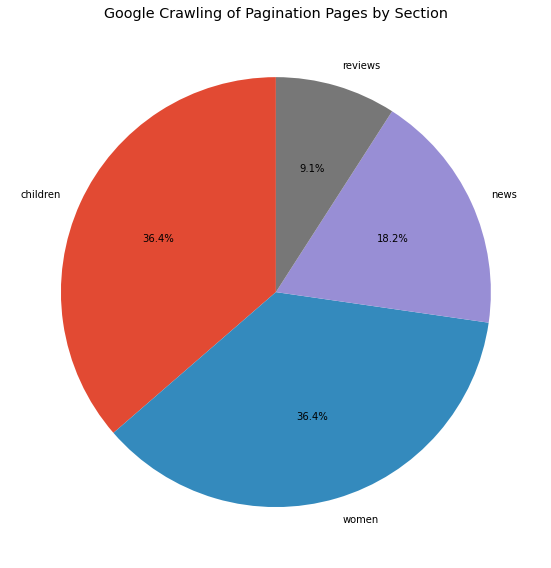

Pagination Requests by Section
    Section  Request Count
0  children              4
1     women              4
2      news              2
3   reviews              1


In [104]:
import re
import matplotlib.pyplot as plt

# Видалення пропущених значень у DataFrame
log_df = log_df.dropna()

# Переконаємося, що всі значення в колонці 'Path' є рядками
log_df['Path'] = log_df['Path'].astype(str)

# Додавання типу сторінок, включаючи визначення пагінації
page_types = []
for path in log_df['Path']:
    if 'page-' in path:
        page_types.append('Pagination')
    elif path in ['/', 'http://paniyanovska.ua/', 'https://paniyanovska.ua/']:
        page_types.append('Main')
    elif re.match(r'^\/(uk|ru)?\/?(women|men|children)\/$', path):
        page_types.append('Category')
    elif re.match(r'^\/(uk|ru)?\/?(women|men|children)\/[^\/]+\/$', path):
        page_types.append('Category')
    elif re.search(r'\d', path) and not re.search(r'(\/razmer-|\/page-)', path):
        page_types.append('Product')
    elif re.search(r'(\/sezon-|\/razmer-|\/sostav-|\/cvet-|\/material-|\/stil-|\/kroj-|\/naznachenie-|\/risunok-|\/detali-|\/svojstva-|\/vyrez-|\/tip-)', path):
        page_types.append('Filter')
    elif '/articles/' in path or '/news/' in path:
        page_types.append('Blog')
    elif '/reviews/' in path:
        page_types.append('Reviews')
    elif re.search(r'\.(jpg|jpeg|png|gif|webp)$', path, re.IGNORECASE):
        page_types.append('Images')
    else:
        page_types.append('Other')

# Додавання нового стовпця 'Page type' до DataFrame
log_df['Page type'] = page_types

# Фільтрація ботів Google та сторінок пагінації
google_bots = log_df[log_df['Bot'].str.contains('Google', na=False)]
pagination_pages = google_bots[google_bots['Page type'] == 'Pagination'].copy()

# Витягнення основних розділів із URL
def extract_section(path):
    match = re.match(r'^\/(uk|ru)?\/?(women|men|children|articles|news|reviews)', path)
    if match:
        return match.group(2)  # Повертає основний розділ, якщо він знайдений
    return 'Unknown'

pagination_pages['Section'] = pagination_pages['Path'].apply(extract_section)

# Підрахунок запитів пагінації по розділах
pagination_counts = pagination_pages['Section'].value_counts().reset_index()
pagination_counts.columns = ['Section', 'Request Count']

# Створення кругової діаграми
plt.figure(figsize=(8, 8))
plt.pie(pagination_counts['Request Count'], labels=pagination_counts['Section'], autopct='%1.1f%%', startangle=90)
plt.title('Google Crawling of Pagination Pages by Section')
plt.tight_layout()
plt.show()

# Виведення таблиці з запитами пагінації по розділах
print("Pagination Requests by Section")
print(pagination_counts)
